<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/machinelearning_2023/blob/main/Jobsheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Muhamad Farrel Rizqullah**
# **Kelas : TI3B**
# **Mata Kuliah : Machine  Learning**


### **Praktikum 1 - Klasifikasi 🐱 dan 🐶**

**Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

**Langkah 1 - Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/DatasetML')

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

In [ ]:
# Langkah 2.1. Pra Pengolahan Data Training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DatasetML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [ ]:
# Langkah 2.2. Pra Pengolahan Data Testing
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DatasetML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**

In [ ]:
# Langkah 3.1.  - Inisiasi Model CNN
cnn = tf.keras.models.Sequential()

In [ ]:
# Langkah 3.2. - Pembuatan Layer Konvolusi 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
# Langkah 3.3 - Pembuatan Layer Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Langkah 3.5 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# Langkah 3.6 - Fully Connected Layer 1 (Input)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Langkah 3.7 - Fully Connected Layer 2 (Output)
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Langkah 3.8 - Compile Model CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

**Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 42s 159ms/step - loss: 0.6836 - accuracy: 0.5604 - val_loss: 0.6575 - val_accuracy: 0.6055
Epoch 2/25
250/250 [==============================] - 38s 154ms/step - loss: 0.6322 - accuracy: 0.6428 - val_loss: 0.5893 - val_accuracy: 0.7040
Epoch 3/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5845 - accuracy: 0.6898 - val_loss: 0.6330 - val_accuracy: 0.6335
Epoch 4/25
250/250 [==============================] - 37s 150ms/step - loss: 0.5461 - accuracy: 0.7206 - val_loss: 0.5438 - val_accuracy: 0.7315
Epoch 5/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5262 - accuracy: 0.7333 - val_loss: 0.5220 - val_accuracy: 0.7570
Epoch 6/25
250/250 [==============================] - 39s 155ms/step - loss: 0.4942 - accuracy: 0.7616 - val_loss: 0.5114 - val_accuracy: 0.7570
Epoch 7/25
250/250 [==============================] - 38s 151ms/step - loss: 0.4791 - accuracy: 0.7673 - val_loss: 0.4947 - val_ac

**Langkah 5 - Prediksi dengan 1 Citra**

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/DatasetML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 20ms/step
dog


### **Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAT**

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

**Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 15s 0us/step


**Langkah 3 - Verifikasi Data**

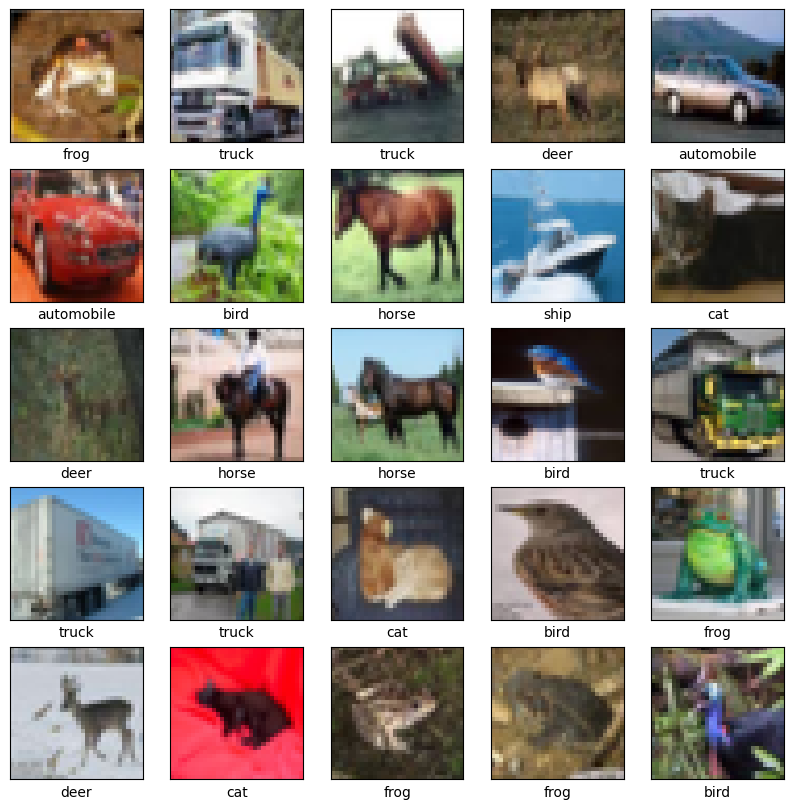

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Langkah 4 - Buat Model CNN**

In [ ]:
# Langkah 4.1. - Buat Layer Konvolusi

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Langkah 4.2. - Cek Arsitektur Konvolusi
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
# Langkah 4.3. - Tambahkan Layer Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# Langkah 4.4. - Cek Arsitektur Model CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4938 - accuracy: 0.4587 - val_loss: 1.1917 - val_accuracy: 0.5746
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1249 - accuracy: 0.6027 - val_loss: 1.0160 - val_accuracy: 0.6429
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9789 - accuracy: 0.6569 - val_loss: 0.9523 - val_accuracy: 0.6670
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8899 - accuracy: 0.6869 - val_loss: 0.9134 - val_accuracy: 0.6824
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8211 - accuracy: 0.7125 - val_loss: 0.8863 - val_accuracy: 0.6901
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7682 - accuracy: 0.7315 - val_loss: 0.8501 - val_accuracy: 0.7096
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7180 - accuracy: 0.7492 - val_loss: 0.8828 - val_accur

**Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8570 - accuracy: 0.7137 - 691ms/epoch - 2ms/step


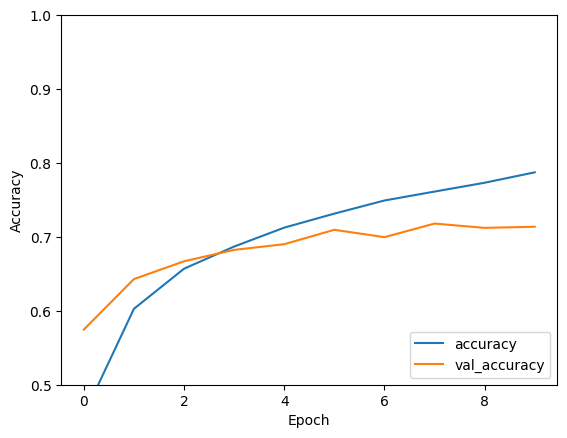

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.713699996471405


### **Tugas Praktikum 1**

**Langkah 1: Impor pustaka dan modul yang diperlukan**

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

**Langkah 2: Memuat dataset CIFAR-10**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


**Langkah 3: Normalisasi data dan konversi label ke vektor one-hot encoded**

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Langkah 4: Memisahkan data latih menjadi data latih dan data validasi**

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)**

In [5]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

**Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data**

In [6]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

**Langkah 7: Membuat model dan mengompilasi**

In [7]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

**Langkah 8: Melatih model dengan ImageDataGenerator**

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=30,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/30
625/625 [==============================] - 34s 54ms/step - loss: 1.4875 - accuracy: 0.4694 - val_loss: 1.2322 - val_accuracy: 0.5629
Epoch 2/30
625/625 [==============================] - 36s 58ms/step - loss: 1.3677 - accuracy: 0.5264 - val_loss: 1.1185 - val_accuracy: 0.6103
Epoch 3/30
625/625 [==============================] - 33s 54ms/step - loss: 1.2805 - accuracy: 0.5650 - val_loss: 1.0646 - val_accuracy: 0.6318
Epoch 4/30
625/625 [==============================] - 34s 54ms/step - loss: 1.2089 - accuracy: 0.5936 - val_loss: 0.9793 - val_accuracy: 0.6625
Epoch 5/30
625/625 [==============================] - 33s 52ms/step - loss: 1.1429 - accuracy: 0.6198 - val_loss: 1.0072 - val_accuracy: 0.6628
Epoch 6/30
625/625 [==============================] - 34s 55ms/step - loss: 1.1043 - accuracy: 0.6379 - val_loss: 0.9216 - val_accuracy: 0.6886
Epoch 7/30
625/625 [==============================] - 33s 52ms/step - loss: 1.0609 - accuracy: 0.6551 - val_loss: 0.9722 - val_accuracy:

**Langkah 9: Mengevaluasi model pada set tes**

In [12]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6585 - accuracy: 0.8218


**Langkah 10: Melakukan prediksi**

<Axes: >

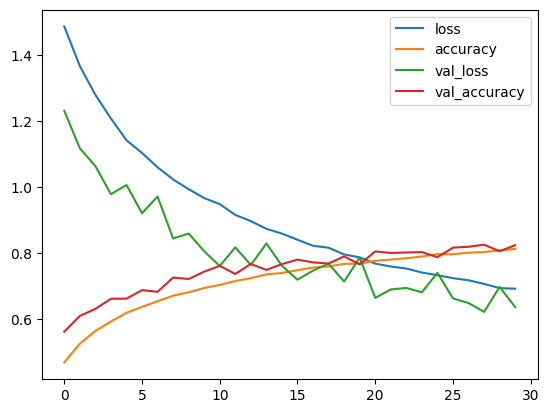

In [13]:
pd.DataFrame(history.history).plot()

**Langkah 11: Tampilkan laporan klasifikasi**

In [14]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.90      0.93      0.91      1000
           2       0.82      0.70      0.76      1000
           3       0.73      0.58      0.65      1000
           4       0.76      0.84      0.80      1000
           5       0.79      0.68      0.73      1000
           6       0.81      0.91      0.86      1000
           7       0.84      0.89      0.86      1000
           8       0.94      0.88      0.91      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



**Langkah 12: Menampilkan visualisasi hasil prediksi**

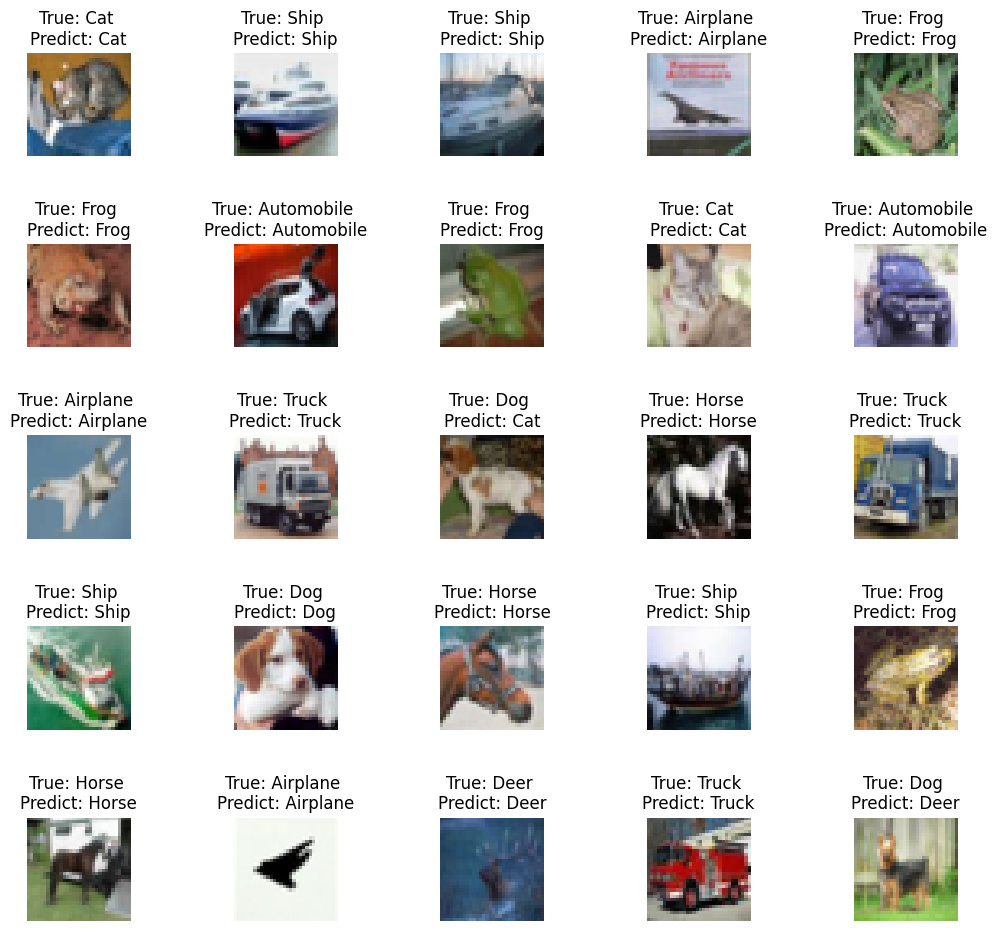

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### **Tugas Praktikum 2**

**Langkah 1: Memuat Dataset MNIST**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**Langkah 2: Normalisasi Gambar ke Rentang [0, 1]**

In [ ]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

**Langkah 3: Mengonversi Label ke Format One-Hot Encoding**

In [ ]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

**Langkah 4: Menampilkan Informasi tentang Dataset**

In [ ]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


**Langkah 5: Membangun Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

**Langkah 6: Mengompilasi Model**

In [ ]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Langkah 7: Menampilkan Ringkasan Model**

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

**Langkah 8: Melatih Model**

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 7s - loss: 0.3726 - accuracy: 0.8844 - val_loss: 0.0878 - val_accuracy: 0.9738 - 7s/epoch - 22ms/step
Epoch 2/10
329/329 - 3s - loss: 0.1013 - accuracy: 0.9691 - val_loss: 0.0638 - val_accuracy: 0.9806 - 3s/epoch - 8ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0727 - accuracy: 0.9789 - val_loss: 0.0533 - val_accuracy: 0.9831 - 2s/epoch - 7ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0537 - val_accuracy: 0.9846 - 2s/epoch - 6ms/step
Epoch 5/10
329/329 - 4s - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0464 - val_accuracy: 0.9872 - 4s/epoch - 13ms/step
Epoch 6/10
329/329 - 4s - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0450 - val_accuracy: 0.9869 - 4s/epoch - 13ms/step
Epoch 7/10
329/329 - 3s - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0454 - val_accuracy: 0.9869 - 3s/epoch - 9ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0413 - val_accuracy: 0.9884 - 2s/epoch - 7ms/step
Epoch 9/10
329/329 - 

**Langkah 9: Plot Sejarah Pelatihan**

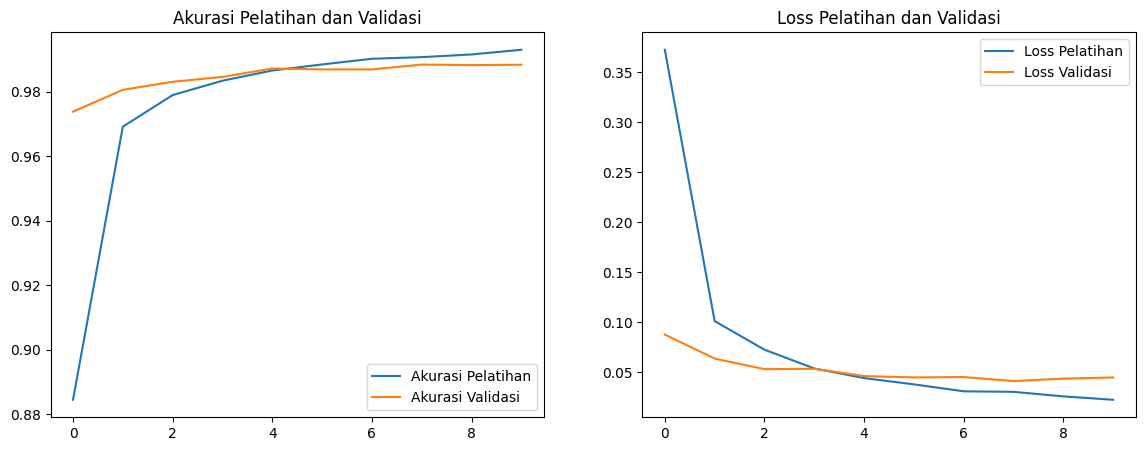

In [ ]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

**Langkah 10: Evaluasi Model pada Kumpulan Data Uji**

In [ ]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.03089066781103611
Akurasi Validasi: 0.9919999837875366


**Langkah 11: Menghasilkan Nilai Prediksi pada Kumpulan Data Uji**

In [ ]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


**Langkah 12: Mendekode Nilai Prediksi**

In [ ]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

**Langkah 13: Menampilkan Laporan Klasifikasi**

In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Langkah 14: Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap**

Text(58.222222222222214, 0.5, 'Aktual')

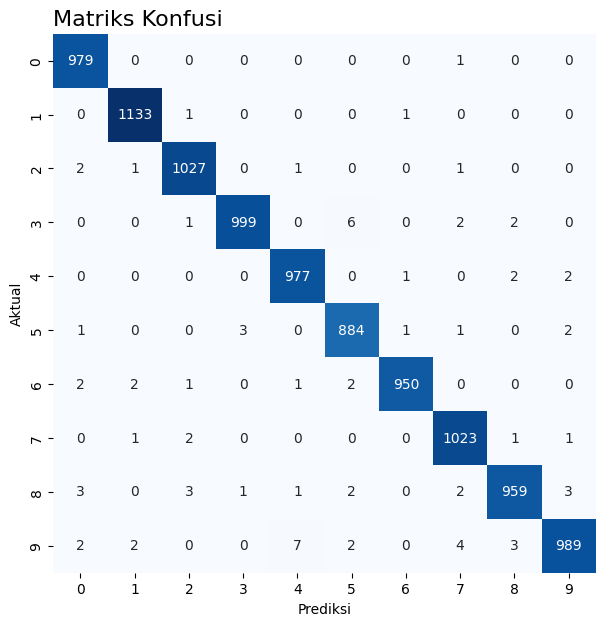

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

**Langkah 15: Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)**

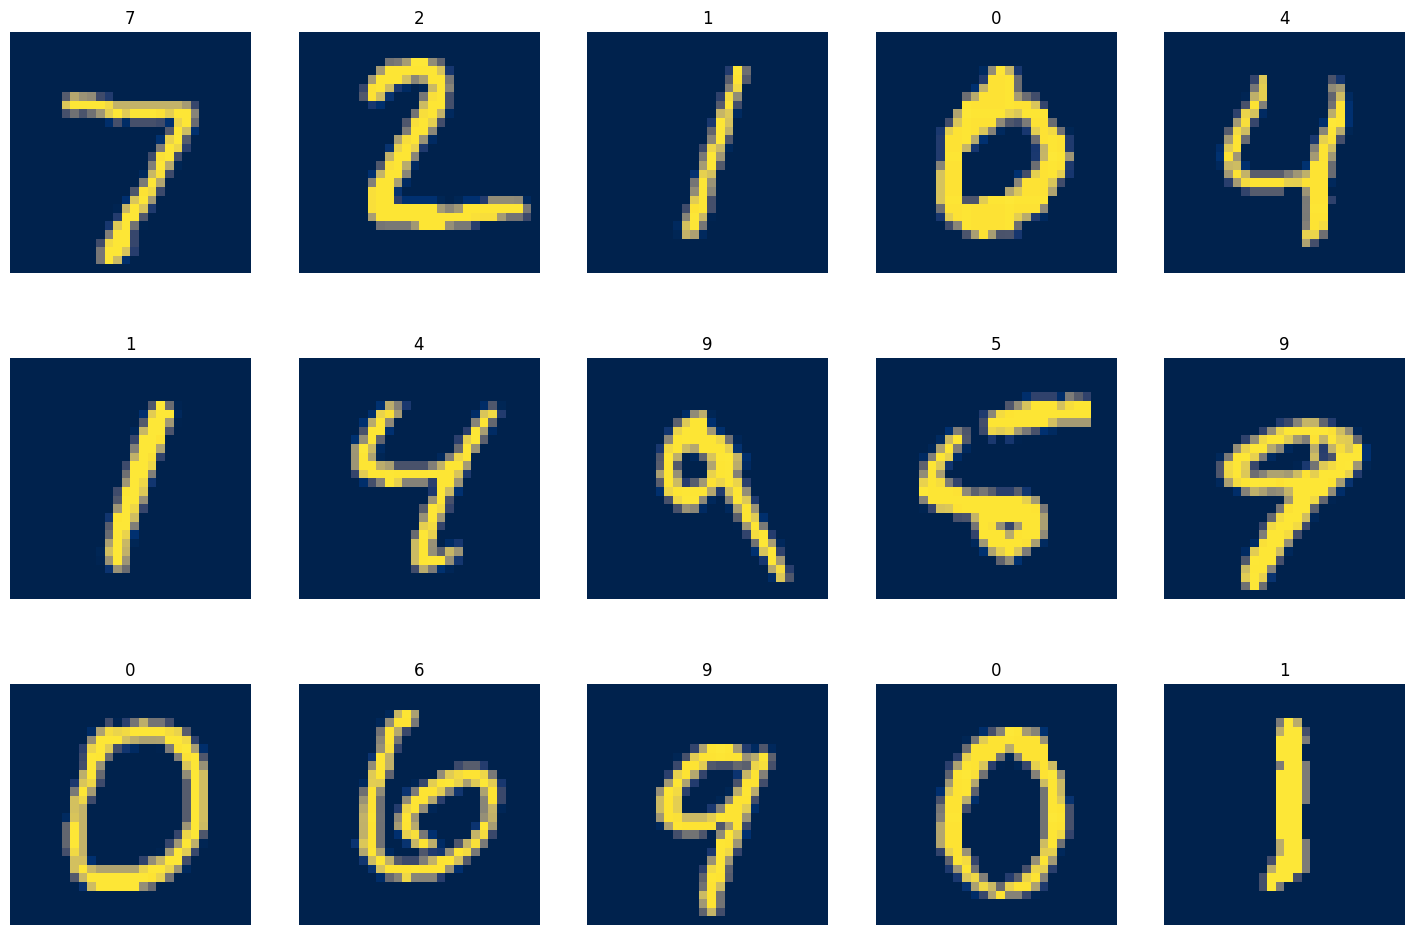

In [ ]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')